Python Partial Dependency Plots are used to visualize the influence of certain features on model predictions for supervised machine learning algorithms, utilizing partial dependence plots.



Code can be found at: https://github.com/SauceCat/PDPbox

Documentation can be found at: http://pdpbox.readthedocs.io/en/latest/


There are lot of model agnostic methods are available to interpret black box models. Global interpretability techniques aim to give better results of the model as a whole (i.e., the global effect of the features on the target variable). One such global interpretable model agnostic method is partial dependency plots (PDPPlots).

PDP's are used to visualize interactions between any two features to validate whether the model is able see if any dependency available between two or more features.

The basic idea behind the PDP plots the average effect of different features on model prediction. Let **f** be a mathematical function learned by the model (f can be any model). The function is responsible to provide the probability or score for the given input features.

If we want plot a Pdp plot for feature *x1*, and we marginalize on the rest of features represent by set *S*, by setting the feature *x1* is our value of interest. Then look at the average effect of our model (i.e., f) on feature x1.

It's important to note that pdp plots cannot give best results if feature **x1** is correlated with feature set S.

In [1]:
# We can use the above python library pdpbox to create PDP plots

In [2]:
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.6 MB/s eta 0:00:00


In [3]:
import pdpbox

In [4]:
pdpbox.__version__

'0.3.0'

Downloading the dataset and converting it into pandas dataframe

Wine dataset: Using chemical analysis to determine the origin of wines.

Features:

---


1.  Alcohol
2.  Malic acid
3.  Ash
4.  Alcalinity of ash  
5.  Magnesium
6.  Total phenols
7.  Flavanoids
8.  Nonflavanoid phenols
9.  Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


---

Target: class

Dataset: https://archive.ics.uci.edu/dataset/109/wine

Download link: https://archive.ics.uci.edu/static/public/109/wine.zip

In [5]:
!pip install ucimlrepo

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
from ucimlrepo import fetch_ucirepo

In [8]:
# display all columns of the dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# plotting parameters

plt.rc('font', size=9)
plt.rc('axes', labelsize=8, titlesize=9)
plt.rc('legend', fontsize=9)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [10]:
wine_data = fetch_ucirepo(id=109)

In [11]:
# into pandas dataframe

In [12]:
wine_dataframe = pd.concat((wine_data.data.features, wine_data.data.targets), axis=1)

In [13]:
# shape of the dataframe

In [14]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [15]:
wine_dataframe.rename(columns={'0D280_0D315_of_diluted_wines': 'Diluted_wines'}, inplace=True)

In [16]:
wine_dataframe.head(n=5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
# target class

In [18]:
wine_dataframe['class'].unique()

array([1, 2, 3])

Looking at each column and understand it's importance

1. Looking at the Target column

In [19]:
# unique wine classes

In [20]:
wine_dataframe['class'].unique()

array([1, 2, 3])

In [21]:
# looking at the class distribution

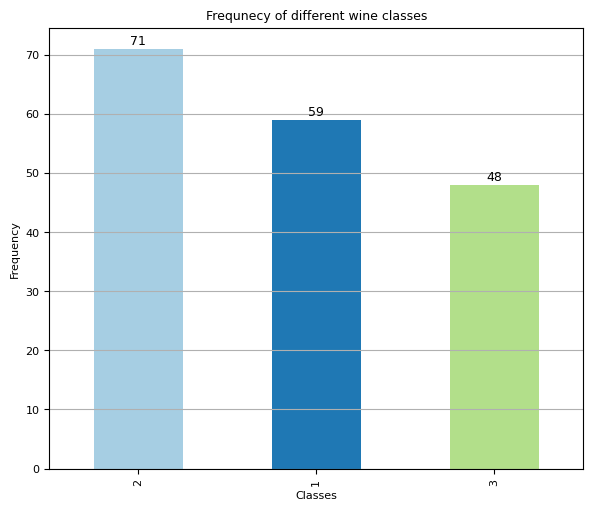

In [22]:
# value counts
x = wine_dataframe['class'].value_counts()

ax = x.plot.bar(figsize=(6, 5), legend=False, color=plt.cm.Paired(np.arange(x.shape[0])))

ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.title('Frequnecy of different wine classes')
plt.grid(axis='y')
plt.show()

2. Looking at the Alcohol column

In [23]:
# 5 point summary statistics for alcohol column

In [24]:
wine_dataframe['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [25]:
# from the above plot the mean and median are close each other - seems no skew in this column

In [26]:
# looking at the distribution of the Alcohol column

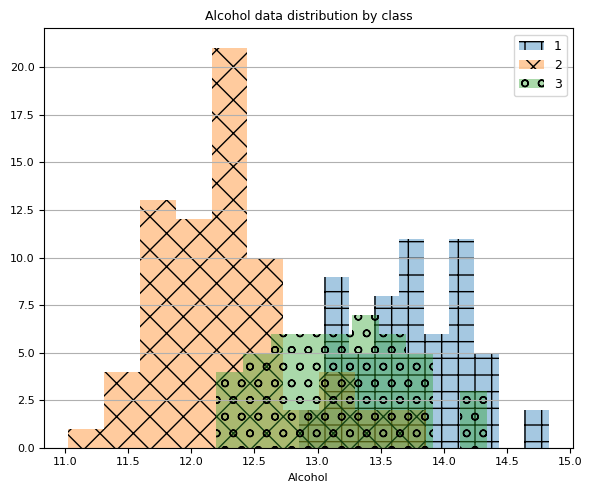

In [31]:
# looking at the distribution of the Alcohol column - per class

wine_dataframe_1 = wine_dataframe[wine_dataframe['class'] == 1].reset_index(drop=True)
wine_dataframe_2 = wine_dataframe[wine_dataframe['class'] == 2].reset_index(drop=True)
wine_dataframe_3 = wine_dataframe[wine_dataframe['class'] == 3].reset_index(drop=True)

# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Alcohol'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "+"}, kde=False)
sns.distplot(wine_dataframe_2['Alcohol'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Alcohol'], bins=10, ax=ax, label='3', hist_kws={"hatch": "o"}, kde=False)
plt.title('Alcohol data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

3. Looking at Malicacid column

In [32]:
# 5 point summary of Malicacid column

In [33]:
wine_dataframe['Malicacid'].describe()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: Malicacid, dtype: float64

In [ ]:
# mean and median are far apart form each other; there may be skewness present in this column

In [ ]:
# by plotting the histogram we can look it distribution, skewness other statistics

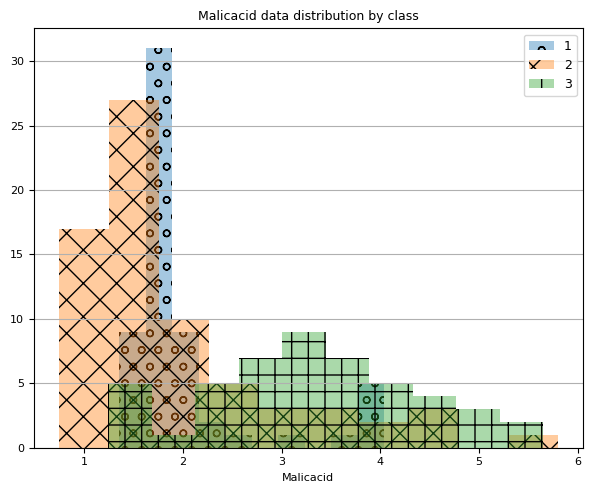

In [37]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Malicacid'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "o"}, kde=False)
sns.distplot(wine_dataframe_2['Malicacid'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Malicacid'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Malicacid data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

3. Looking at the Ash column

In [38]:
# looking at the ash distribution

In [42]:
# 5 point summary for Ash distribution

In [43]:
wine_dataframe['Ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: Ash, dtype: float64

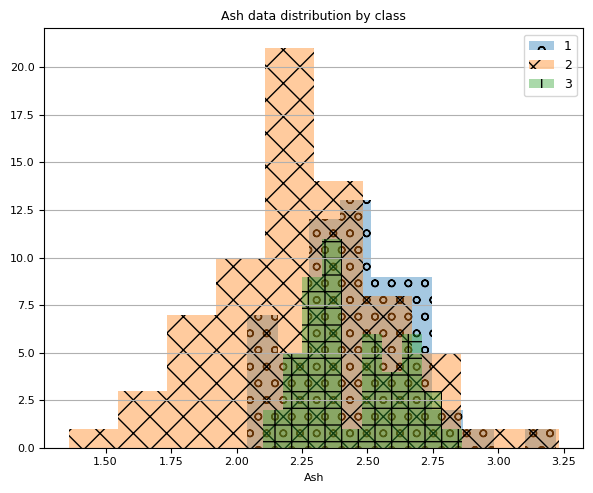

In [44]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Ash'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "o"}, kde=False)
sns.distplot(wine_dataframe_2['Ash'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Ash'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Ash data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

4. Looking at the Alcalinity Of Ash column

In [45]:
# 5 point summary of the Alcalinity Of Ash column

In [47]:
wine_dataframe['Alcalinity_of_ash'].describe()

count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: Alcalinity_of_ash, dtype: float64

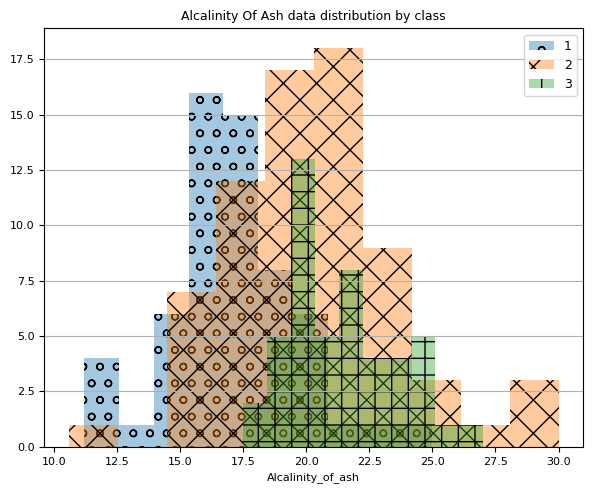

In [52]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Alcalinity_of_ash'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "o"}, kde=False)
sns.distplot(wine_dataframe_2['Alcalinity_of_ash'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Alcalinity_of_ash'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Alcalinity Of Ash data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

5. Looking at the Magnesium column

In [53]:
# 5 point summary of the data

In [54]:
wine_dataframe['Magnesium'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64

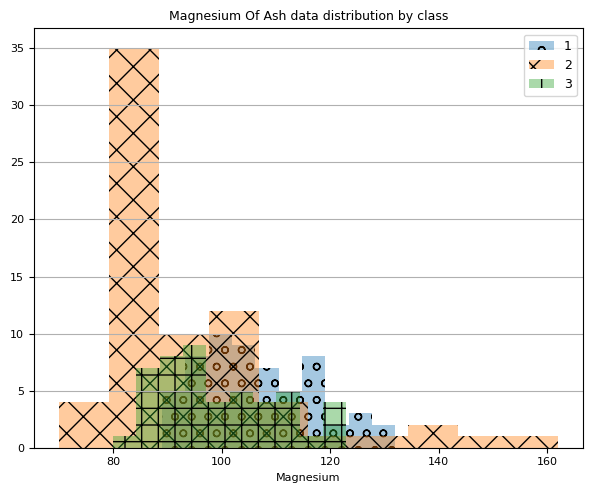

In [55]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Magnesium'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "o"}, kde=False)
sns.distplot(wine_dataframe_2['Magnesium'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Magnesium'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Magnesium data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

6. Looking at the Total phenols columns

In [56]:
# 5 point summary for the column

In [57]:
wine_dataframe['Total_phenols'].describe()

count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: Total_phenols, dtype: float64

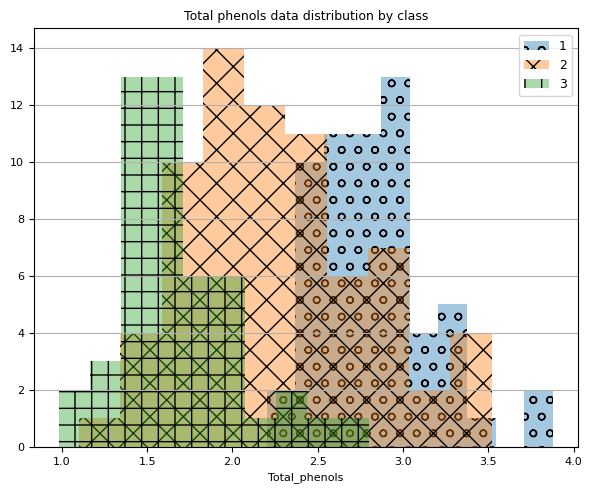

In [59]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Total_phenols'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "o"}, kde=False)
sns.distplot(wine_dataframe_2['Total_phenols'], bins=10, ax=ax, label='2', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_3['Total_phenols'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Total phenols data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()

7. Looking at the Flavanoids column

In [60]:
# 5 point summary of Flavanoids column

In [61]:
wine_dataframe['Flavanoids'].describe()

count    178.000000
mean       2.029270
std        0.998859
min        0.340000
25%        1.205000
50%        2.135000
75%        2.875000
max        5.080000
Name: Flavanoids, dtype: float64

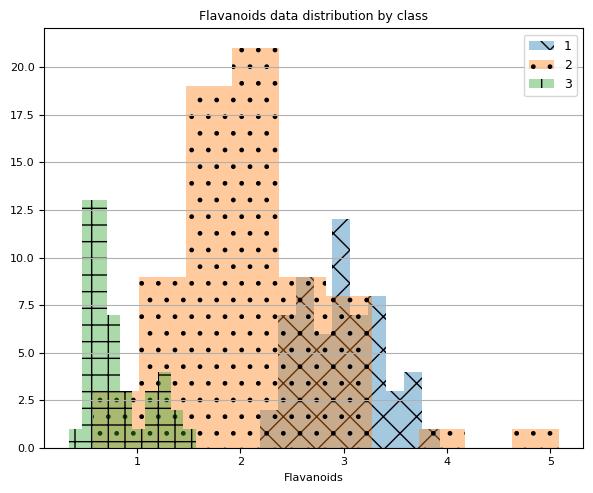

In [64]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(wine_dataframe_1['Flavanoids'], bins=10,  ax=ax, label='1', hist_kws={"hatch": "x"}, kde=False)
sns.distplot(wine_dataframe_2['Flavanoids'], bins=10, ax=ax, label='2', hist_kws={"hatch": "."}, kde=False)
sns.distplot(wine_dataframe_3['Flavanoids'], bins=10, ax=ax, label='3', hist_kws={"hatch": "+"}, kde=False)
plt.title('Flavanoids data distribution by class')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()